In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('../../Datasets/dataset/train.csv')
df_test = pd.read_csv('../../Datasets/dataset/test.csv')
df_train.head()

,property_id,place,property_type,area(sqft),n_bedrooms,n_baths,smoking_friendly,pwd_facility,ev_chargepoint,furnishing_category,...,n_hospitals_nearby,n_grocery_stores_nearby,n_schools_nearby,main_road_distance(km.),transportion_modes_available,rent_available_for,property_age,total_acco_in_property,amenities_available,rent_amt(USD)
0,PRP_1,Alaska,apartment,1908,3.0,2.0,1.0,0,0,Unfurnished,...,2.0,18,3,<=1.5,cab; auto,male only,> 10 yrs.,45,security; cctv;,253.0
1,PRP_2,Texas,apartment,9,3.0,2.0,1.0,0,0,Unfurnished,...,Unknown,12,3,<=0.5,NaN,family,313,373,security; cctv; garden; power_water_backup;,222.0
2,PRP_3,Washington,apartment,1133,NaN,1.0,1.0,0,0,Semi-furnished,...,2.0,17,3,<=1.5,metro; bus; cab; auto,NaN,> 10 yrs.,317,security; cctv; garden; power_water_backup; sw...,462.0
3,PRP_4,Texas,apartment,927,1.0,1.0,1.0,0,0,Unfurnished,...,5.0,23,3,<=0.5,bus; cab; auto,female or family,> 5 yrs.,392,security; cctv; garden; power_water_backup; sw...,149.0
4,PRP_5,Virginia,apartment,1047,2.0,NaN,1.0,0,0,Unfurnished,...,NaN,23,0,NaN,metro; bus; cab; auto,any bachelor or family,Newly Built,194,security; cctv;,137.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   26250 non-null  object 
 1   place                         26250 non-null  object 
 2   property_type                 26250 non-null  object 
 3   area(sqft)                    26250 non-null  int64  
 4   n_bedrooms                    19466 non-null  float64
 5   n_baths                       19487 non-null  float64
 6   smoking_friendly              19548 non-null  float64
 7   pwd_facility                  26250 non-null  int64  
 8   ev_chargepoint                26250 non-null  int64  
 9   furnishing_category           26250 non-null  object 
 10  laundry_facility              22324 non-null  object 
 11  parking_facility              19424 non-null  object 
 12  part_of_USA                   24933 non-null  object 
 13  p

In [4]:
df_train['rent_amt(USD)'].value_counts()

0.0       119
145.0      78
250.0      74
187.0      73
170.0      70
         ... 
2809.0      1
2246.0      1
3272.0      1
1550.0      1
1336.0      1
Name: rent_amt(USD), Length: 1997, dtype: int64

(array([2.6249e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0. ,  1148979.3,  2297958.6,  3446937.9,  4595917.2,
         5744896.5,  6893875.8,  8042855.1,  9191834.4, 10340813.7,
        11489793. ]),
 <BarContainer object of 10 artists>)

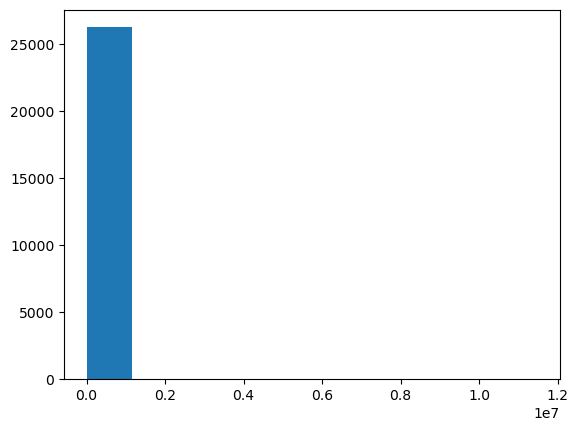

In [5]:
plt.hist(df_train["rent_amt(USD)"])

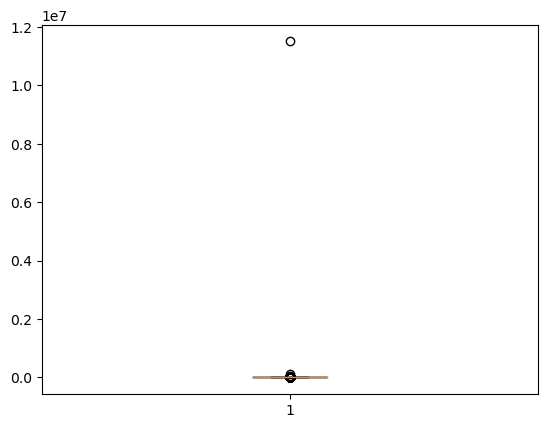

<Figure size 1000x1000 with 0 Axes>

In [6]:

plt.boxplot(df_train["rent_amt(USD)"])
fig = plt.figure(figsize =(10, 10))
plt.show()

In [7]:
sum(df_train['rent_amt(USD)']>3000)

66

In [8]:
df_train['rent_amt(USD)'].max()

11489793.0

In [9]:
df_train=df_train[df_train['rent_amt(USD)']<=3000]

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26184 entries, 0 to 26249
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   26184 non-null  object 
 1   place                         26184 non-null  object 
 2   property_type                 26184 non-null  object 
 3   area(sqft)                    26184 non-null  int64  
 4   n_bedrooms                    19417 non-null  float64
 5   n_baths                       19435 non-null  float64
 6   smoking_friendly              19497 non-null  float64
 7   pwd_facility                  26184 non-null  int64  
 8   ev_chargepoint                26184 non-null  int64  
 9   furnishing_category           26184 non-null  object 
 10  laundry_facility              22277 non-null  object 
 11  parking_facility              19384 non-null  object 
 12  part_of_USA                   24871 non-null  object 
 13  p

(array([11522.,  8398.,  3272.,  1581.,   698.,   361.,   178.,    87.,
           56.,    31.]),
 array([   0. ,  299.6,  599.2,  898.8, 1198.4, 1498. , 1797.6, 2097.2,
        2396.8, 2696.4, 2996. ]),
 <BarContainer object of 10 artists>)

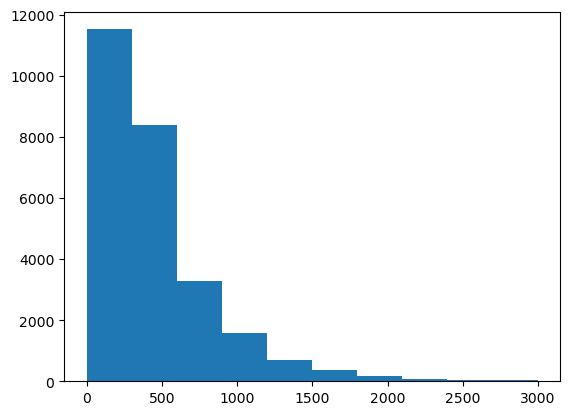

In [11]:
plt.hist(df_train["rent_amt(USD)"])

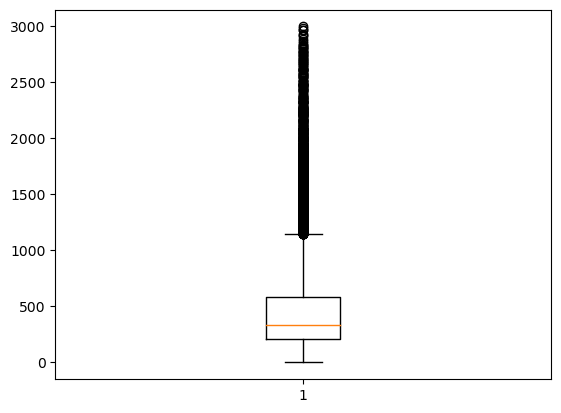

<Figure size 1000x1000 with 0 Axes>

In [12]:
plt.boxplot(df_train["rent_amt(USD)"])
fig = plt.figure(figsize =(10, 10))
plt.show()

In [13]:
sum(df_train['rent_amt(USD)']>1000)

2289

In [14]:
df_train=df_train[df_train['rent_amt(USD)']<=1000]

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23895 entries, 0 to 26249
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   23895 non-null  object 
 1   place                         23895 non-null  object 
 2   property_type                 23895 non-null  object 
 3   area(sqft)                    23895 non-null  int64  
 4   n_bedrooms                    17727 non-null  float64
 5   n_baths                       17753 non-null  float64
 6   smoking_friendly              17787 non-null  float64
 7   pwd_facility                  23895 non-null  int64  
 8   ev_chargepoint                23895 non-null  int64  
 9   furnishing_category           23895 non-null  object 
 10  laundry_facility              20308 non-null  object 
 11  parking_facility              17600 non-null  object 
 12  part_of_USA                   22710 non-null  object 
 13  p

(array([ 854., 5375., 5293., 4023., 2581., 1794., 1436., 1025.,  819.,
         695.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

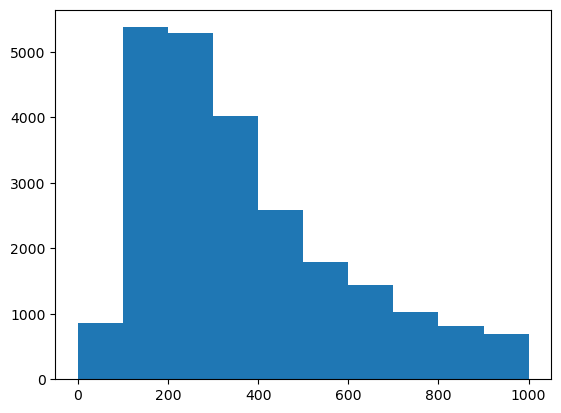

In [16]:
plt.hist(df_train["rent_amt(USD)"])

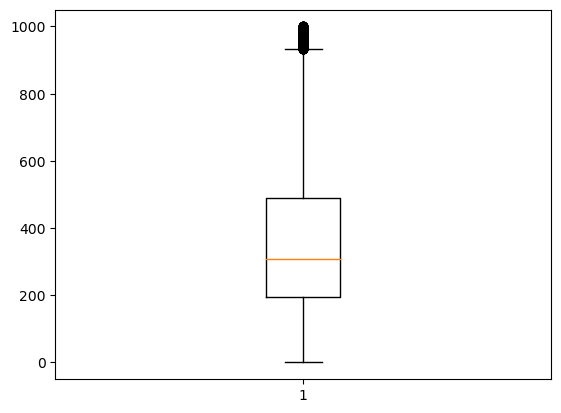

<Figure size 1000x1000 with 0 Axes>

In [17]:
plt.boxplot(df_train["rent_amt(USD)"])
fig = plt.figure(figsize =(10, 10))
plt.show()

In [18]:
df_train['rent_amt(USD)'].value_counts()

0.0      119
145.0     78
250.0     74
187.0     73
170.0     70
        ... 
6.0        1
52.0       1
25.0       1
36.0       1
32.0       1
Name: rent_amt(USD), Length: 978, dtype: int64

In [19]:
df_train.corr()

,area(sqft),n_bedrooms,n_baths,smoking_friendly,pwd_facility,ev_chargepoint,pet_friendly,n_grocery_stores_nearby,n_schools_nearby,total_acco_in_property,rent_amt(USD)
area(sqft),1.000000,0.005468,-0.002047,0.004912,-0.001782,-0.000745,0.003882,0.007181,0.000075,-0.009135,-0.004977
n_bedrooms,0.005468,1.000000,0.661844,-0.024896,-0.053582,-0.042872,-0.078363,-0.004696,-0.007861,-0.311082,0.094773
n_baths,-0.002047,0.661844,1.000000,-0.008468,0.013949,0.012202,-0.019561,-0.004561,-0.006958,-0.174612,0.148466
smoking_friendly,0.004912,-0.024896,-0.008468,1.000000,-0.148987,-0.118306,0.043933,-0.002754,0.005596,0.089808,-0.089718
pwd_facility,-0.001782,-0.053582,0.013949,-0.148987,1.000000,0.267117,0.156127,-0.006728,0.001161,0.048281,0.037303
ev_chargepoint,-0.000745,-0.042872,0.012202,-0.118306,0.267117,1.000000,0.095271,0.003216,-0.011869,0.042292,0.097869
pet_friendly,0.003882,-0.078363,-0.019561,0.043933,0.156127,0.095271,1.000000,0.005066,0.005102,0.129192,0.012079
n_grocery_stores_nearby,0.007181,-0.004696,-0.004561,-0.002754,-0.006728,0.003216,0.005066,1.000000,0.003745,0.004058,-0.004652
n_schools_nearby,0.000075,-0.007861,-0.006958,0.005596,0.001161,-0.011869,0.005102,0.003745,1.000000,0.002448,-0.000882
total_acco_in_property,-0.009135,-0.311082,-0.174612,0.089808,0.048281,0.042292,0.129192,0.004058,0.002448,1.000000,-0.038159


In [20]:
df_train.shape,df_test.shape

((23895, 25), (11250, 24))

In [21]:
df_train.isna().sum()[df_train.isna().sum()>0]

n_bedrooms                      6168
n_baths                         6142
smoking_friendly                6108
laundry_facility                3587
parking_facility                6295
part_of_USA                     1185
pet_friendly                    1172
traffic_intensity               1164
n_hospitals_nearby              1022
main_road_distance(km.)         3753
transportion_modes_available    3822
rent_available_for              3741
dtype: int64

In [22]:
df_train['n_bedrooms'].value_counts()

2.0    7352
1.0    5642
3.0    3111
0.0     786
4.0     679
5.0     141
6.0      14
7.0       2
Name: n_bedrooms, dtype: int64

In [23]:
df_train['n_bedrooms'].fillna(method='ffill',axis=0,inplace=True)

In [24]:
df_train['n_baths'].value_counts()

1.0    9804
2.0    7269
3.0     450
0.0     176
4.0      48
5.0       5
6.0       1
Name: n_baths, dtype: int64

In [25]:
df_train['n_baths'].median()

1.0

In [26]:
df_train['n_baths'].fillna(method='ffill',axis=0,inplace=True)

In [27]:
df_train['smoking_friendly'].value_counts()

1.0    11764
0.0     6023
Name: smoking_friendly, dtype: int64

In [28]:
df_train['smoking_friendly'].fillna(df_train['smoking_friendly'].median(),inplace=True)

In [29]:
df_train['smoking_friendly'].value_counts()

1.0    17872
0.0     6023
Name: smoking_friendly, dtype: int64

In [30]:
df_train['laundry_facility'].value_counts()

w/d in unit           9951
laundry on site       4998
w/d hookups           3515
laundry in bldg       1547
no laundry on site     297
Name: laundry_facility, dtype: int64

In [31]:
df_train['laundry_facility'].fillna(method='ffill',axis=0,inplace=True)

In [32]:
df_train['parking_facility'].value_counts()

carport               6665
off-street parking    4500
attached garage       3934
detached garage       1626
street parking         717
no parking             134
valet parking           24
Name: parking_facility, dtype: int64

In [33]:
df_train['parking_facility'].fillna(method='ffill',axis=0,inplace=True)

In [34]:
df_train['part_of_USA'].value_counts()

South USA    8309
West USA     6893
North USA    4728
East USA     2780
Name: part_of_USA, dtype: int64

In [35]:
df_train['part_of_USA'].fillna(method='bfill',axis=0,inplace=True)

In [36]:
df_train['pet_friendly'].value_counts()

1.0    15791
0.0     6932
Name: pet_friendly, dtype: int64

In [37]:
df_train['pet_friendly'].fillna(df_train['pet_friendly'].median(),inplace=True)

In [38]:
df_train['traffic_intensity'].value_counts()

Morning_High, Afternoon_High, Night_Low        5703
Morning_Medium, Afternoon_Low, Night_Medium    5697
Morning_Low, Afternoon_High, Night_High        5668
Morning_High, Afternoon_Low, Night_High        5663
Name: traffic_intensity, dtype: int64

In [39]:
df_train['traffic_intensity'].fillna(method='ffill',axis=0,inplace=True)

In [40]:
df_train['n_hospitals_nearby'].value_counts()

3.0        2527
1.0        2488
4.0        2487
2.0        2445
6.0        2430
5.0        2417
0.0        2412
7.0        2391
Unknown    1639
Many       1637
Name: n_hospitals_nearby, dtype: int64

In [41]:
df_train['n_hospitals_nearby'].fillna(method='ffill',axis=0,inplace=True)

In [42]:
df_train['n_hospitals_nearby'].value_counts()

3.0        2633
4.0        2608
1.0        2606
2.0        2540
5.0        2524
6.0        2518
7.0        2510
0.0        2495
Unknown    1742
Many       1719
Name: n_hospitals_nearby, dtype: int64

In [43]:
df_train['main_road_distance(km.)'].value_counts()

<=0.5    10144
<=1.5     9998
Name: main_road_distance(km.), dtype: int64

In [44]:
df_train['main_road_distance(km.)'].fillna(method='ffill',axis=0,inplace=True)

In [45]:
df_train['transportion_modes_available'].value_counts()

metro; bus; cab; auto    5179
cab                      5010
bus; cab; auto           4955
cab; auto                4929
Name: transportion_modes_available, dtype: int64

In [46]:
df_train['transportion_modes_available'].fillna(method='ffill',axis=0,inplace=True)

In [47]:
df_train['rent_available_for'].value_counts()

female or family          5087
family                    5042
male only                 5019
any bachelor or family    5006
Name: rent_available_for, dtype: int64

In [48]:
df_train['rent_available_for'].fillna(method='ffill',axis=0,inplace=True)

In [49]:
df_train.isna().sum()

property_id                     0
place                           0
property_type                   0
area(sqft)                      0
n_bedrooms                      0
n_baths                         0
smoking_friendly                0
pwd_facility                    0
ev_chargepoint                  0
furnishing_category             0
laundry_facility                0
parking_facility                0
part_of_USA                     0
pet_friendly                    0
traffic_intensity               0
n_hospitals_nearby              0
n_grocery_stores_nearby         0
n_schools_nearby                0
main_road_distance(km.)         0
transportion_modes_available    0
rent_available_for              0
property_age                    0
total_acco_in_property          0
amenities_available             0
rent_amt(USD)                   0
dtype: int64

# Encoding

In [50]:
df_train['main_road_distance(km.)'] = df_train['main_road_distance(km.)'].str.replace('<=', '', regex=True)

In [51]:
df_train['main_road_distance(km.)']

0        1.5
1        0.5
2        1.5
3        0.5
4        0.5
        ... 
26245    1.5
26246    1.5
26247    1.5
26248    1.5
26249    1.5
Name: main_road_distance(km.), Length: 23895, dtype: object

In [52]:
df_train['property_age'] = df_train['property_age'].str.replace('>', '', regex=True)

In [53]:
df_train['property_age'] 

0            10 yrs.
1                313
2            10 yrs.
3             5 yrs.
4        Newly Built
            ...     
26245         5 yrs.
26246    Newly Built
26247        10 yrs.
26248     Almost New
26249     Almost New
Name: property_age, Length: 23895, dtype: object

In [54]:
df_train['amenities_available'] = df_train['amenities_available'].str.replace(';', '', regex=True)

In [55]:
df_train['amenities_available']

0                                            security cctv
1                  security cctv garden power_water_backup
2        security cctv garden power_water_backup swimmi...
3        security cctv garden power_water_backup swimmi...
4                                            security cctv
                               ...                        
26245              security cctv garden power_water_backup
26246              security cctv garden power_water_backup
26247                                        security cctv
26248                                        security cctv
26249                                                 None
Name: amenities_available, Length: 23895, dtype: object

In [56]:
df_train['transportion_modes_available'] = df_train['transportion_modes_available'].str.replace(';', '', regex=True)

In [57]:
df_train['transportion_modes_available']

0                  cab auto
1                  cab auto
2        metro bus cab auto
3              bus cab auto
4        metro bus cab auto
                ...        
26245    metro bus cab auto
26246                   cab
26247                   cab
26248          bus cab auto
26249          bus cab auto
Name: transportion_modes_available, Length: 23895, dtype: object

In [58]:
numeric_col = list(df_train.select_dtypes(exclude = 'object').columns)
cat_col = list(df_train.select_dtypes(include = 'object').columns)
cat_col

['property_id',
 'place',
 'property_type',
 'furnishing_category',
 'laundry_facility',
 'parking_facility',
 'part_of_USA',
 'traffic_intensity',
 'n_hospitals_nearby',
 'main_road_distance(km.)',
 'transportion_modes_available',
 'rent_available_for',
 'property_age',
 'amenities_available']

In [59]:
numeric_col

['area(sqft)',
 'n_bedrooms',
 'n_baths',
 'smoking_friendly',
 'pwd_facility',
 'ev_chargepoint',
 'pet_friendly',
 'n_grocery_stores_nearby',
 'n_schools_nearby',
 'total_acco_in_property',
 'rent_amt(USD)']

In [60]:
df_train["property_age"].value_counts()

 10 yrs.       5688
Almost New     5655
  5 yrs.       5623
Newly Built    5527
703             132
444             126
728             124
922             124
313             120
851             118
431             114
576             113
563             112
776             111
268             111
295              97
Name: property_age, dtype: int64

In [61]:
df_train.columns

Index(['property_id', 'place', 'property_type', 'area(sqft)', 'n_bedrooms',
       'n_baths', 'smoking_friendly', 'pwd_facility', 'ev_chargepoint',
       'furnishing_category', 'laundry_facility', 'parking_facility',
       'part_of_USA', 'pet_friendly', 'traffic_intensity',
       'n_hospitals_nearby', 'n_grocery_stores_nearby', 'n_schools_nearby',
       'main_road_distance(km.)', 'transportion_modes_available',
       'rent_available_for', 'property_age', 'total_acco_in_property',
       'amenities_available', 'rent_amt(USD)'],
      dtype='object')

In [62]:
cat_col

['property_id',
 'place',
 'property_type',
 'furnishing_category',
 'laundry_facility',
 'parking_facility',
 'part_of_USA',
 'traffic_intensity',
 'n_hospitals_nearby',
 'main_road_distance(km.)',
 'transportion_modes_available',
 'rent_available_for',
 'property_age',
 'amenities_available']

In [63]:
df_train["place"].value_counts()

Georgia          2940
Texas            2920
Massachusetts    2912
Virginia         2909
Illinois         2872
Alaska           2856
California       2419
New York         2081
Washington       1986
Name: place, dtype: int64

In [64]:
df_train["property_type"].value_counts()

apartment     18138
house          4166
PG sharing      757
duplex          569
cabin           160
flat            105
Name: property_type, dtype: int64

In [65]:
property =df_train["property_type"].value_counts().iloc[:2].index

In [66]:
property

Index(['apartment', 'house'], dtype='object')

In [67]:
df_train["property_type"]=df_train["property_type"].apply(lambda x:x if x in property else "flat")

In [68]:
df_train["property_type"].value_counts()

apartment    18138
house         4166
flat          1591
Name: property_type, dtype: int64

In [69]:
df_train["furnishing_category"].value_counts()

Semi-furnished     12025
Unfurnished        11162
Fully-Furnished      708
Name: furnishing_category, dtype: int64

In [70]:
furnishing=df_train["furnishing_category"].value_counts().iloc[:2].index

In [71]:
furnishing

Index(['Semi-furnished', 'Unfurnished'], dtype='object')

In [72]:
df_train['furnishing_category']=df_train["furnishing_category"].apply(lambda x:x if x in furnishing else "Semi-furnished" )

In [73]:
df_train["furnishing_category"].value_counts()

Semi-furnished    12733
Unfurnished       11162
Name: furnishing_category, dtype: int64

In [74]:
df_train['furnishing_category']=df_train['furnishing_category'].map({'Semi-furnished':1,'Unfurnished':0})

In [75]:
df_train["furnishing_category"].value_counts()

1    12733
0    11162
Name: furnishing_category, dtype: int64

In [76]:
df_train['laundry_facility'].value_counts()

w/d in unit           11741
laundry on site        5830
w/d hookups            4220
laundry in bldg        1767
no laundry on site      337
Name: laundry_facility, dtype: int64

In [77]:
laundry = df_train["laundry_facility"].value_counts().iloc[:2].index

In [78]:
df_train['laundry_facility']=df_train["laundry_facility"].apply(lambda x:x if x in laundry else "laundry in bldg" )

In [79]:
df_train['laundry_facility'].value_counts()

w/d in unit        11741
laundry in bldg     6324
laundry on site     5830
Name: laundry_facility, dtype: int64

In [80]:
laundry = df_train["laundry_facility"].value_counts().iloc[:2].index

In [81]:
df_train['laundry_facility']=df_train["laundry_facility"].apply(lambda x:x if x in laundry else "laundry in bldg" )

In [82]:
df_train['laundry_facility'].value_counts()

laundry in bldg    12154
w/d in unit        11741
Name: laundry_facility, dtype: int64

In [83]:
df_train['laundry_facility']=df_train['laundry_facility'].map({'laundry in bldg':1,'w/d in unit':0})

In [84]:
df_train['laundry_facility'].value_counts()

1    12154
0    11741
Name: laundry_facility, dtype: int64

In [85]:
df_train['parking_facility'].value_counts()

carport               8873
off-street parking    6236
attached garage       5367
detached garage       2253
street parking         949
no parking             187
valet parking           30
Name: parking_facility, dtype: int64

In [86]:
parking = df_train["parking_facility"].value_counts().iloc[:3].index

In [87]:
parking

Index(['carport', 'off-street parking', 'attached garage'], dtype='object')

In [88]:
df_train['parking_facility']=df_train["parking_facility"].apply(lambda x:x if x in parking else "attached garage" )

In [89]:
df_train['parking_facility'].value_counts()

carport               8873
attached garage       8786
off-street parking    6236
Name: parking_facility, dtype: int64

In [90]:
df_train['parking_facility']=df_train['parking_facility'].map({'carport':1,'attached garage':2,'off-street parking':0})

In [91]:
df_train['parking_facility'].value_counts()

1    8873
2    8786
0    6236
Name: parking_facility, dtype: int64

In [92]:
df_train['part_of_USA'].value_counts()

South USA    8729
West USA     7248
North USA    4988
East USA     2930
Name: part_of_USA, dtype: int64

In [93]:
df_train['part_of_USA']=df_train['part_of_USA'].map({'East USA':0,'North USA':1,'West USA':2,'South USA':3})

In [94]:
df_train['part_of_USA'].value_counts()

3    8729
2    7248
1    4988
0    2930
Name: part_of_USA, dtype: int64

In [95]:
df_train['traffic_intensity'].value_counts()

Morning_Low, Afternoon_High, Night_High        6014
Morning_High, Afternoon_High, Night_Low        5985
Morning_Medium, Afternoon_Low, Night_Medium    5950
Morning_High, Afternoon_Low, Night_High        5946
Name: traffic_intensity, dtype: int64

In [96]:
df_train['traffic_intensity']=df_train['traffic_intensity'].map({'Morning_High, Afternoon_Low, Night_High':0,'Morning_Medium, Afternoon_Low, Night_Medium':1,'Morning_High, Afternoon_High, Night_Low':2,'Morning_Low, Afternoon_High, Night_High':3})

In [97]:
df_train['traffic_intensity'].value_counts()

3    6014
2    5985
1    5950
0    5946
Name: traffic_intensity, dtype: int64

In [98]:
df_train['n_hospitals_nearby'].value_counts()

3.0        2633
4.0        2608
1.0        2606
2.0        2540
5.0        2524
6.0        2518
7.0        2510
0.0        2495
Unknown    1742
Many       1719
Name: n_hospitals_nearby, dtype: int64

In [99]:
hospitals = df_train["n_hospitals_nearby"].value_counts().iloc[:-1].index

In [100]:
hospitals

Index(['3.0', '4.0', '1.0', '2.0', '5.0', '6.0', '7.0', '0.0', 'Unknown'], dtype='object')

In [101]:
df_train['n_hospitals_nearby']=df_train["n_hospitals_nearby"].apply(lambda x:x if x in hospitals else "8.0" )

In [102]:
df_train['n_hospitals_nearby'].value_counts()

3.0        2633
4.0        2608
1.0        2606
2.0        2540
5.0        2524
6.0        2518
7.0        2510
0.0        2495
Unknown    1742
8.0        1719
Name: n_hospitals_nearby, dtype: int64

In [103]:
# df_train["n_hospitals_nearby"].value_counts().median()

In [104]:
# df_train['n_hospitals_nearby']=df_train["n_hospitals_nearby"].apply(lambda x:x if x in hospitals else "0.0" )

In [105]:
df_train['n_hospitals_nearby'].value_counts()

3.0        2633
4.0        2608
1.0        2606
2.0        2540
5.0        2524
6.0        2518
7.0        2510
0.0        2495
Unknown    1742
8.0        1719
Name: n_hospitals_nearby, dtype: int64

In [106]:
df_train["n_hospitals_nearby"].value_counts().median()

2521.0

In [107]:
df_train['n_hospitals_nearby'].replace("Unknown", '0.0', inplace=True)

In [108]:
df_train["n_hospitals_nearby"].value_counts()

0.0    4237
3.0    2633
4.0    2608
1.0    2606
2.0    2540
5.0    2524
6.0    2518
7.0    2510
8.0    1719
Name: n_hospitals_nearby, dtype: int64

In [109]:
df_train['main_road_distance(km.)'].value_counts()

0.5    12031
1.5    11864
Name: main_road_distance(km.), dtype: int64

In [110]:
df_train['transportion_modes_available'].value_counts()

metro bus cab auto    6118
cab                   5958
bus cab auto          5952
cab auto              5867
Name: transportion_modes_available, dtype: int64

In [111]:
df_train['transportion_modes_available']=df_train['transportion_modes_available'].map({'metro bus cab auto':3,'bus cab auto':2,'cab auto':1,'cab':0})

In [112]:
df_train['transportion_modes_available'].value_counts()

3    6118
0    5958
2    5952
1    5867
Name: transportion_modes_available, dtype: int64

In [113]:
df_train['rent_available_for'].value_counts()

female or family          6084
any bachelor or family    5963
family                    5936
male only                 5912
Name: rent_available_for, dtype: int64

In [114]:
df_train['rent_available_for']=df_train['rent_available_for'].map({'female or family':3,'any bachelor or family':2,'family':1,'male only':0})

In [115]:
df_train['rent_available_for'].value_counts()

3    6084
2    5963
1    5936
0    5912
Name: rent_available_for, dtype: int64

In [116]:
df_train['property_age'].value_counts()

 10 yrs.       5688
Almost New     5655
  5 yrs.       5623
Newly Built    5527
703             132
444             126
728             124
922             124
313             120
851             118
431             114
576             113
563             112
776             111
268             111
295              97
Name: property_age, dtype: int64

In [117]:
property_1 = df_train["property_age"].value_counts().iloc[:4].index

In [118]:
df_train['property_age']=df_train["property_age"].apply(lambda x:x if x in property_1 else "Almost New" )

In [119]:
df_train["property_age"].value_counts()

Almost New     7057
 10 yrs.       5688
  5 yrs.       5623
Newly Built    5527
Name: property_age, dtype: int64

In [120]:
df_train['property_age'].replace("Newly Built", '0', inplace=True)

In [121]:
df_train["property_age"].value_counts()

Almost New    7057
 10 yrs.      5688
  5 yrs.      5623
0             5527
Name: property_age, dtype: int64

In [122]:
df_train['property_age'].replace("Newly ", '0', inplace=True)

In [123]:
df_train["property_age"].value_counts()

Almost New    7057
 10 yrs.      5688
  5 yrs.      5623
0             5527
Name: property_age, dtype: int64

In [124]:
df_train['property_age'].replace('Almost New','2 yrs.',inplace=True)

In [125]:
for x in df_train["property_age"]:
        x=x.replace('yrs.','')
        print(x)
        

 10 
2 
 10 
  5 
0
 10 
0
 10 
 10 
2 
0
  5 
  5 
  5 
2 
 10 
 10 
0
 10 
  5 
2 
 10 
0
0
 10 
2 
  5 
 10 
2 
  5 
2 
2 
2 
2 
0
 10 
0
0
  5 
  5 
  5 
2 
2 
0
  5 
 10 
0
0
0
2 
0
2 
 10 
0
2 
  5 
0
 10 
2 
2 
0
0
  5 
2 
0
0
0
2 
2 
  5 
2 
 10 
2 
 10 
 10 
 10 
0
0
  5 
  5 
2 
2 
2 
2 
 10 
 10 
2 
  5 
  5 
0
0
0
0
 10 
2 
 10 
0
0
2 
 10 
  5 
 10 
2 
  5 
  5 
2 
0
  5 
2 
 10 
0
2 
  5 
0
 10 
2 
2 
0
0
  5 
2 
2 
2 
 10 
 10 
 10 
2 
0
  5 
0
  5 
2 
 10 
2 
2 
0
 10 
2 
0
2 
2 
0
0
0
2 
2 
2 
 10 
2 
0
0
2 
  5 
0
  5 
2 
  5 
  5 
 10 
0
2 
2 
  5 
  5 
 10 
0
0
 10 
 10 
 10 
  5 
2 
  5 
 10 
2 
0
  5 
0
 10 
2 
0
2 
 10 
0
2 
 10 
0
 10 
2 
0
2 
 10 
0
  5 
2 
2 
2 
 10 
0
 10 
  5 
2 
2 
2 
0
0
2 
 10 
 10 
0
2 
0
0
 10 
2 
 10 
  5 
0
0
 10 
 10 
2 
  5 
 10 
0
  5 
0
2 
2 
0
0
2 
2 
 10 
2 
2 
2 
0
0
2 
0
2 
2 
 10 
 10 
2 
  5 
  5 
  5 
 10 
 10 
2 
2 
  5 
2 
0
0
 10 
2 
0
0
2 
0
0
0
2 
2 
 10 
2 
2 
  5 
0
 10 
0
  5 
 10 
  5 
2 
0
2 
 10 
2 
2 
0
2 
0
0
2

In [126]:
df_train['property_age']=df_train['property_age'].map({' 10 yrs.':10,'2 yrs.':2,'  5 yrs.':5,'0':0})

In [127]:
df_train['property_age'].value_counts()

2     7057
10    5688
5     5623
0     5527
Name: property_age, dtype: int64

In [128]:
df_train['amenities_available'].value_counts()

security cctv                                                    9844
security cctv garden power_water_backup                          5516
security cctv garden power_water_backup swimming sports & gym    4369
None                                                             4166
Name: amenities_available, dtype: int64

In [129]:
df_train['amenities_available']=df_train['amenities_available'].map({'security cctv':1,'security cctv garden power_water_backup':2,'security cctv garden power_water_backup swimming sports & gym':3,'None':0})

In [130]:
df_train['amenities_available'].value_counts()

1    9844
2    5516
3    4369
0    4166
Name: amenities_available, dtype: int64

In [131]:
df_train['property_type'].value_counts()

apartment    18138
house         4166
flat          1591
Name: property_type, dtype: int64

In [132]:
df_train['property_type']=df_train['property_type'].map({'apartment':2,'house':1,'flat':0})

In [133]:
df_train['property_type'].value_counts()

2    18138
1     4166
0     1591
Name: property_type, dtype: int64

In [134]:
df_train['place'].value_counts()

Georgia          2940
Texas            2920
Massachusetts    2912
Virginia         2909
Illinois         2872
Alaska           2856
California       2419
New York         2081
Washington       1986
Name: place, dtype: int64

In [135]:
df_train['place']=df_train['place'].map({'Washington':0,'New York':1,'California':2,'Alaska':3,'Illinois':4,'Virginia':5,'Massachusetts':6,'Texas':7,'Georgia':8})

In [136]:
df_train['place'].value_counts()

8    2940
7    2920
6    2912
5    2909
4    2872
3    2856
2    2419
1    2081
0    1986
Name: place, dtype: int64

In [137]:
df_train.drop('property_id',axis=1,inplace=True)

In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23895 entries, 0 to 26249
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   place                         23895 non-null  int64  
 1   property_type                 23895 non-null  int64  
 2   area(sqft)                    23895 non-null  int64  
 3   n_bedrooms                    23895 non-null  float64
 4   n_baths                       23895 non-null  float64
 5   smoking_friendly              23895 non-null  float64
 6   pwd_facility                  23895 non-null  int64  
 7   ev_chargepoint                23895 non-null  int64  
 8   furnishing_category           23895 non-null  int64  
 9   laundry_facility              23895 non-null  int64  
 10  parking_facility              23895 non-null  int64  
 11  part_of_USA                   23895 non-null  int64  
 12  pet_friendly                  23895 non-null  float64
 13  t

In [139]:
df_train

,place,property_type,area(sqft),n_bedrooms,n_baths,smoking_friendly,pwd_facility,ev_chargepoint,furnishing_category,laundry_facility,...,n_hospitals_nearby,n_grocery_stores_nearby,n_schools_nearby,main_road_distance(km.),transportion_modes_available,rent_available_for,property_age,total_acco_in_property,amenities_available,rent_amt(USD)
0,3,2,1908,3.0,2.0,1.0,0,0,0,1,...,2.0,18,3,1.5,1,0,10,45,1,253.0
1,7,2,9,3.0,2.0,1.0,0,0,0,1,...,0.0,12,3,0.5,1,1,2,373,2,222.0
2,0,2,1133,3.0,1.0,1.0,0,0,1,1,...,2.0,17,3,1.5,3,1,10,317,3,462.0
3,7,2,927,1.0,1.0,1.0,0,0,0,1,...,5.0,23,3,0.5,2,3,5,392,3,149.0
4,5,2,1047,2.0,1.0,1.0,0,0,0,1,...,5.0,23,0,0.5,3,2,0,194,1,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,3,2,775,2.0,1.0,1.0,0,0,1,0,...,1.0,8,4,1.5,3,2,5,435,2,328.0
26246,6,2,775,2.0,2.0,0.0,0,0,0,1,...,0.0,19,3,1.5,0,0,0,323,2,138.0
26247,3,2,1054,2.0,2.0,1.0,0,0,1,0,...,2.0,18,0,1.5,0,1,10,23,1,243.0
26248,6,2,775,1.0,2.0,1.0,0,0,1,0,...,3.0,12,1,1.5,2,1,2,438,1,318.0


# Encoding on test DATA

In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   11250 non-null  object 
 1   place                         11250 non-null  object 
 2   property_type                 11250 non-null  object 
 3   area(sqft)                    11250 non-null  int64  
 4   n_bedrooms                    8276 non-null   float64
 5   n_baths                       8301 non-null   float64
 6   smoking_friendly              8306 non-null   float64
 7   pwd_facility                  11250 non-null  int64  
 8   ev_chargepoint                11250 non-null  int64  
 9   furnishing_category           11250 non-null  object 
 10  laundry_facility              8673 non-null   object 
 11  parking_facility              7157 non-null   object 
 12  part_of_USA                   10688 non-null  object 
 13  p

In [141]:
df_test.isna().sum()[df_test.isna().sum()>0]

n_bedrooms                      2974
n_baths                         2949
smoking_friendly                2944
laundry_facility                2577
parking_facility                4093
part_of_USA                      562
pet_friendly                     542
traffic_intensity                561
n_hospitals_nearby               543
main_road_distance(km.)         1734
transportion_modes_available    1728
rent_available_for              1778
dtype: int64

In [142]:
df_test['n_bedrooms'].value_counts()

2.0    3376
1.0    2372
3.0    1881
4.0     361
0.0     202
5.0      75
6.0       6
7.0       3
Name: n_bedrooms, dtype: int64

In [143]:
df_test['n_bedrooms'].fillna(method='bfill',axis=0,inplace=True)

In [144]:
df_test['n_baths'].fillna(method='ffill',axis=0,inplace=True)

In [145]:
df_test['n_baths'].median()

1.0

In [146]:
df_test['n_baths'].fillna(method='ffill',axis=0,inplace=True)

In [147]:
df_test['smoking_friendly'].fillna(df_test['smoking_friendly'].median(),inplace=True)

In [148]:
df_test['laundry_facility'].value_counts()

w/d in unit           4282
w/d hookups           2528
laundry on site       1233
laundry in bldg        542
no laundry on site      88
Name: laundry_facility, dtype: int64

In [149]:
df_test['laundry_facility'].fillna(method='bfill',axis=0,inplace=True)

In [150]:
df_test['laundry_facility'].value_counts()

w/d in unit           5365
w/d hookups           3547
laundry on site       1591
laundry in bldg        643
no laundry on site     104
Name: laundry_facility, dtype: int64

In [151]:
df_test['n_baths'].fillna(method='ffill',axis=0,inplace=True)

In [152]:
df_test['parking_facility'].fillna(method='ffill',axis=0,inplace=True)

In [153]:
df_test['part_of_USA'].fillna(method='bfill',axis=0,inplace=True)

In [154]:
df_test['n_baths'].fillna(method='ffill',axis=0,inplace=True)

In [155]:
df_test['pet_friendly'].fillna(df_test['pet_friendly'].median(),inplace=True)

In [156]:
df_test['traffic_intensity'].fillna(method='ffill',axis=0,inplace=True)

In [157]:
df_test['n_hospitals_nearby'].fillna(method='ffill',axis=0,inplace=True)

In [158]:
df_test['main_road_distance(km.)'].fillna(method='ffill',axis=0,inplace=True)

In [159]:
df_test['transportion_modes_available'].fillna(method='ffill',axis=0,inplace=True)

In [160]:
df_test['rent_available_for'].fillna(method='ffill',axis=0,inplace=True)

In [161]:
df_test['place'].value_counts()

Massachusetts    1276
Alaska           1266
Illinois         1261
Georgia          1257
California       1255
New York         1250
Texas            1238
Virginia         1232
Washington       1215
Name: place, dtype: int64

In [162]:
cat_col

['property_id',
 'place',
 'property_type',
 'furnishing_category',
 'laundry_facility',
 'parking_facility',
 'part_of_USA',
 'traffic_intensity',
 'n_hospitals_nearby',
 'main_road_distance(km.)',
 'transportion_modes_available',
 'rent_available_for',
 'property_age',
 'amenities_available']

In [163]:
df_test['place']=df_test['place'].map({'Washington':0,'New York':1,'California':2,'Alaska':3,'Illinois':4,'Virginia':5,'Massachusetts':6,'Texas':7,'Georgia':8})

In [164]:
df_test['place'].value_counts()

6    1276
3    1266
4    1261
8    1257
2    1255
1    1250
7    1238
5    1232
0    1215
Name: place, dtype: int64

In [165]:
df_test['property_type'].value_counts()

apartment     7960
house         2286
PG sharing     502
duplex         288
flat           142
cabin           72
Name: property_type, dtype: int64

In [166]:
# Select first three values by using iloc[] function
property =df_test["property_type"].value_counts().iloc[:2].index

In [167]:
# Select first three values and remaining all are in flat by using lambda Function
df_test["property_type"]=df_test["property_type"].apply(lambda x:x if x in property else "flat")

In [168]:
df_test['property_type'].value_counts()

apartment    7960
house        2286
flat         1004
Name: property_type, dtype: int64

In [169]:
# Change the object name by using map function as shown in below
df_test['property_type']=df_test['property_type'].map({'apartment':2,'house':1,'flat':0})

In [170]:
df_test['property_type'].value_counts()

2    7960
1    2286
0    1004
Name: property_type, dtype: int64

In [171]:
df_test['furnishing_category'].value_counts()

Semi-furnished     5620
Unfurnished        5233
Fully-Furnished     397
Name: furnishing_category, dtype: int64

In [172]:
furnishing=df_test["furnishing_category"].value_counts().iloc[:2].index

In [173]:
df_test['furnishing_category']=df_test["furnishing_category"].apply(lambda x:x if x in furnishing else "Semi-furnished" )

In [174]:
df_test['furnishing_category'].value_counts()

Semi-furnished    6017
Unfurnished       5233
Name: furnishing_category, dtype: int64

In [175]:
df_test['furnishing_category']=df_test['furnishing_category'].map({'Unfurnished':0,'Semi-furnished':1})

In [176]:
df_test['furnishing_category'].value_counts()

1    6017
0    5233
Name: furnishing_category, dtype: int64

In [177]:
df_test['laundry_facility'].value_counts()

w/d in unit           5365
w/d hookups           3547
laundry on site       1591
laundry in bldg        643
no laundry on site     104
Name: laundry_facility, dtype: int64

In [178]:
laundry = df_test["laundry_facility"].value_counts().iloc[:2].index

In [179]:
df_test['laundry_facility']=df_test["laundry_facility"].apply(lambda x:x if x in laundry else "laundry in bldg" )

In [180]:
laundry = df_test["laundry_facility"].value_counts().iloc[:2].index

In [181]:
df_test['laundry_facility']=df_test["laundry_facility"].apply(lambda x:x if x in laundry else "laundry in bldg" )

In [182]:
df_test['laundry_facility'].value_counts()

w/d in unit        5365
w/d hookups        3547
laundry in bldg    2338
Name: laundry_facility, dtype: int64

In [183]:
df_test['laundry_facility']=df_test['laundry_facility'].map({'w/d in unit':0,'laundry in bldg':1})

In [184]:
df_test['laundry_facility'].value_counts()

0.0    5365
1.0    2338
Name: laundry_facility, dtype: int64

In [185]:
df_test['parking_facility'].value_counts()

off-street parking    5270
attached garage       2606
carport               1612
street parking         900
detached garage        551
no parking             301
valet parking            9
Name: parking_facility, dtype: int64

In [186]:
parking = df_test["parking_facility"].value_counts().iloc[:3].index

In [187]:
df_test['parking_facility']=df_test['parking_facility'].apply(lambda x:x if x in parking else 'attached garage')

In [188]:
df_test['parking_facility'].value_counts()

off-street parking    5270
attached garage       4368
carport               1612
Name: parking_facility, dtype: int64

In [189]:
df_test['parking_facility']=df_test['parking_facility'].map({'carport':0,'off-street parking':1,'attached garage':2})

In [190]:
df_test['parking_facility'].value_counts()

1    5270
2    4368
0    1612
Name: parking_facility, dtype: int64

In [191]:
df_test['part_of_USA'].value_counts()

West USA     3743
South USA    3721
North USA    2522
East USA     1264
Name: part_of_USA, dtype: int64

In [192]:
df_test['part_of_USA']=df_test['part_of_USA'].map({'East USA':0,'North USA':1,'South USA':2,'West USA':3})

In [193]:
df_test['part_of_USA'].value_counts()

3    3743
2    3721
1    2522
0    1264
Name: part_of_USA, dtype: int64

In [194]:
df_test['traffic_intensity'].value_counts()

Morning_Low, Afternoon_High, Night_High        2916
Morning_High, Afternoon_High, Night_Low        2798
Morning_High, Afternoon_Low, Night_High        2788
Morning_Medium, Afternoon_Low, Night_Medium    2748
Name: traffic_intensity, dtype: int64

In [195]:
df_test['traffic_intensity']=df_test['traffic_intensity'].map({'Morning_Medium, Afternoon_Low, Night_Medium':0,'Morning_High, Afternoon_Low, Night_High':1,'Morning_High, Afternoon_High, Night_Low':2,'Morning_Low, Afternoon_High, Night_High':3})

In [196]:
df_test['traffic_intensity'].value_counts()

3    2916
2    2798
1    2788
0    2748
Name: traffic_intensity, dtype: int64

In [197]:
df_test['n_hospitals_nearby'].value_counts()

3.0    1500
4.0    1473
5.0    1425
1.0    1404
0.0    1382
6.0    1366
2.0    1352
7.0    1348
Name: n_hospitals_nearby, dtype: int64

In [198]:
df_test['main_road_distance(km.)'].value_counts()

<=0.5    5626
<=1.5    5624
Name: main_road_distance(km.), dtype: int64

In [199]:
# Replace the unncecesary symbols
df_test['main_road_distance(km.)'] = df_test['main_road_distance(km.)'].str.replace('<=', '', regex=True)

In [200]:
df_test['main_road_distance(km.)'].value_counts()

0.5    5626
1.5    5624
Name: main_road_distance(km.), dtype: int64

In [201]:
df_test['transportion_modes_available'].value_counts()

cab; auto                2912
metro; bus; cab; auto    2860
bus; cab; auto           2813
cab                      2665
Name: transportion_modes_available, dtype: int64

In [202]:
df_test['transportion_modes_available'] = df_test['transportion_modes_available'].str.replace(';', '', regex=True)

In [203]:
df_test['transportion_modes_available'].value_counts()

cab auto              2912
metro bus cab auto    2860
bus cab auto          2813
cab                   2665
Name: transportion_modes_available, dtype: int64

In [204]:
df_test['transportion_modes_available']=df_test['transportion_modes_available'].map({'cab':0,'cab auto':1,'bus cab auto':2,'metro bus cab auto':3})

In [205]:
df_test['transportion_modes_available'].value_counts()

1    2912
3    2860
2    2813
0    2665
Name: transportion_modes_available, dtype: int64

In [206]:
df_test['rent_available_for'].value_counts()

female or family          2894
any bachelor or family    2855
family                    2757
male only                 2744
Name: rent_available_for, dtype: int64

In [207]:
df_test['rent_available_for']=df_test['rent_available_for'].map({'family':1,'male only':0,'any bachelor or family':2,'female or family':3})

In [208]:
df_test['rent_available_for'].value_counts()

3    2894
2    2855
1    2757
0    2744
Name: rent_available_for, dtype: int64

In [209]:
df_test['property_age'].value_counts()

Almost New     2893
 > 5 yrs.      2855
> 10 yrs.      2766
Newly Built    2736
Name: property_age, dtype: int64

In [210]:
df_test['property_age'] = df_test['property_age'].str.replace('>', '', regex=True)

In [211]:
df_test['property_age'].replace("Newly Built", '0', inplace=True)

In [212]:
df_test['property_age'].value_counts()

Almost New    2893
  5 yrs.      2855
 10 yrs.      2766
0             2736
Name: property_age, dtype: int64

In [213]:
df_test['property_age'].replace('Almost New','2 yrs.',inplace=True)

In [214]:
df_test['property_age'].value_counts()

2 yrs.      2893
  5 yrs.    2855
 10 yrs.    2766
0           2736
Name: property_age, dtype: int64

In [215]:
for x in df_test["property_age"]:
        x=x.replace('yrs.','')
        print(x)

  5 
 10 
  5 
2 
 10 
2 
  5 
  5 
0
 10 
2 
 10 
  5 
0
  5 
2 
2 
 10 
2 
0
  5 
 10 
 10 
 10 
  5 
 10 
  5 
 10 
  5 
  5 
  5 
 10 
2 
2 
2 
  5 
0
0
 10 
  5 
2 
 10 
  5 
 10 
0
2 
  5 
0
  5 
2 
2 
0
 10 
2 
2 
 10 
2 
 10 
0
2 
  5 
 10 
 10 
2 
  5 
 10 
2 
0
 10 
 10 
  5 
0
0
  5 
  5 
2 
0
  5 
0
2 
  5 
0
 10 
 10 
 10 
2 
 10 
 10 
2 
 10 
 10 
  5 
  5 
0
0
2 
  5 
2 
0
 10 
  5 
2 
  5 
2 
0
0
2 
 10 
 10 
  5 
  5 
0
0
0
  5 
2 
 10 
0
 10 
0
 10 
2 
  5 
  5 
2 
  5 
  5 
0
0
 10 
 10 
 10 
2 
  5 
  5 
0
 10 
2 
0
 10 
 10 
  5 
0
0
0
 10 
 10 
2 
 10 
0
2 
0
2 
2 
0
2 
2 
2 
2 
  5 
  5 
0
2 
  5 
 10 
 10 
  5 
2 
  5 
 10 
 10 
0
  5 
 10 
2 
  5 
2 
0
 10 
  5 
0
  5 
 10 
0
 10 
2 
 10 
0
2 
2 
0
2 
0
0
0
0
 10 
2 
2 
2 
0
  5 
  5 
  5 
 10 
2 
  5 
2 
0
  5 
0
 10 
0
 10 
 10 
2 
0
0
2 
2 
0
2 
 10 
0
0
2 
0
 10 
  5 
  5 
2 
 10 
0
  5 
  5 
0
 10 
0
0
2 
2 
  5 
  5 
0
2 
0
 10 
  5 
0
0
0
  5 
  5 
  5 
 10 
  5 
 10 
2 
 10 
0
2 
 10 
2 
 10 
0
0
0
2 
2

In [216]:
df_test['property_age']=df_test['property_age'].map({' 10 yrs.':10,'2 yrs.':2,'  5 yrs.':5,'0':0})

In [217]:
df_test['property_age'].value_counts()

2     2893
5     2855
10    2766
0     2736
Name: property_age, dtype: int64

In [218]:
df_test['amenities_available'].value_counts()

security; cctv;                                                      4499
security; cctv; garden; power_water_backup;                          2519
None                                                                 2286
security; cctv; garden; power_water_backup; swimming sports & gym    1946
Name: amenities_available, dtype: int64

In [219]:
df_test['amenities_available'] = df_test['amenities_available'].str.replace(';', '', regex=True)

In [220]:
df_test['amenities_available'].value_counts()

security cctv                                                    4499
security cctv garden power_water_backup                          2519
None                                                             2286
security cctv garden power_water_backup swimming sports & gym    1946
Name: amenities_available, dtype: int64

In [221]:
df_test['amenities_available']=df_test['amenities_available'].map({'security cctv':1,'security cctv garden power_water_backup':2,'None':0,'security cctv garden power_water_backup swimming sports & gym':3})

In [222]:
df_test['amenities_available'].value_counts()

1    4499
2    2519
0    2286
3    1946
Name: amenities_available, dtype: int64

In [223]:
df_test['laundry_facility'].dropna()

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
11244    1.0
11245    1.0
11247    0.0
11248    0.0
11249    0.0
Name: laundry_facility, Length: 7703, dtype: float64

In [224]:
# df_test['laundry_facility'].value_counts()

In [225]:
# df_test.isna().sum()[df_test.isna().sum()>0]

In [226]:
df_test['laundry_facility'].fillna(method='bfill',axis=0,inplace=True)

In [227]:
df_test.isna().sum()[df_test.isna().sum()>0]

Series([], dtype: int64)

In [228]:
df_test.drop('property_id',axis=1,inplace=True)

In [229]:
df_test

,place,property_type,area(sqft),n_bedrooms,n_baths,smoking_friendly,pwd_facility,ev_chargepoint,furnishing_category,laundry_facility,...,traffic_intensity,n_hospitals_nearby,n_grocery_stores_nearby,n_schools_nearby,main_road_distance(km.),transportion_modes_available,rent_available_for,property_age,total_acco_in_property,amenities_available
0,4,2,813,3.0,1.0,0.0,0,0,1,0.0,...,2,3.0,17,1,1.5,2,3,5,435,1
1,2,1,1775,3.0,2.0,0.0,1,0,0,0.0,...,3,3.0,19,4,1.5,3,0,10,0,0
2,5,2,1105,3.0,2.0,0.0,0,0,0,0.0,...,2,2.0,10,4,0.5,2,0,5,322,2
3,5,1,1659,3.0,2.0,1.0,0,0,0,0.0,...,3,1.0,22,1,1.5,2,0,2,0,0
4,5,2,1327,2.0,2.0,1.0,0,0,0,0.0,...,2,2.0,15,0,1.5,0,0,10,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,5,2,400,1.0,1.0,1.0,0,0,0,1.0,...,0,2.0,10,2,1.5,0,3,5,224,3
11246,5,0,1500,3.0,1.0,0.0,0,0,1,0.0,...,2,1.0,9,1,1.5,3,1,10,36,2
11247,3,0,1433,3.0,4.0,0.0,0,0,1,0.0,...,2,6.0,21,2,1.5,2,0,2,25,2
11248,8,2,1065,3.0,3.0,1.0,0,0,1,0.0,...,2,6.0,16,2,0.5,0,3,2,351,1


# Model Building

In [230]:
X = df_train.drop('rent_amt(USD)',axis=1)
y = df_train['rent_amt(USD)']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [232]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler()

In [233]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
model_rfr = RandomForestRegressor()

In [240]:
model_rfr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [241]:
model_rfr.score(X_train_scaled,y_train)

0.9266599805160282

In [242]:
model_rfr.fit(X_test_scaled,y_test)

RandomForestRegressor()

In [243]:
model_rfr.score(X_test_scaled,y_test)

0.9292238975406691